In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN

In [100]:
import warnings
warnings.filterwarnings('ignore')

In [101]:
# Deserializing les dades

std_df = pd.read_pickle('../data/standard_df.pkl')
std_df.head()

,place_type,capacity,is_free,altitude,country,region,latitude,longitude,num_nearby_routes,num_services
15,0,18.0,1,7.831220,0,3,3.775000,0.887562,4.477337,1.098612
31,0,6.0,1,7.669028,0,3,3.770063,1.154482,2.484907,1.098612
35,0,2.0,1,7.626083,1,12,3.771733,1.146729,1.098612,0.693147
36,0,6.0,1,7.710205,2,13,3.773016,0.958936,4.510860,1.609438
39,1,160.0,0,6.401917,0,3,3.764736,1.266018,3.178054,1.945910


In [102]:
# Abans d'aplicar DBSCAN tranformem tots els valors a una array
valors = std_df.loc[:, std_df.columns].values
valors.shape

(236, 10)

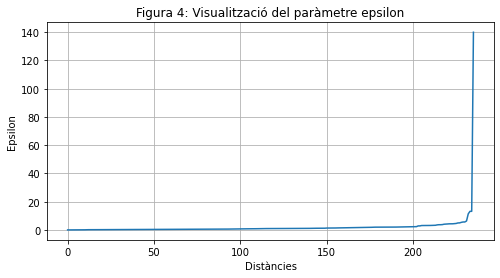

In [103]:
# Primerament, hem de buscar els paràmetres per el minPoints i la epsilon
# El dataset té 10 dimensions, per tant aquest serà el nostre valor de minPoints
# Per trobar la epsilon hem de calcular la distància de cada punt amb el punt més proper

punts_veins  = NearestNeighbors(n_neighbors=2)

# Creo el model
n_neigh=punts_veins .fit(valors) 

# Trobo els punts
distancies,index=n_neigh.kneighbors(valors) 

# Visualitzo els resultats, primer he d'ordenar les distancies obtingudes
# Organitzo les distàncies
distancies = np.sort(distancies, axis = 0)
distancies = distancies[:, 1]
fig = plt.subplots(figsize=(8, 4))
plt.plot(distancies)
plt.xlabel("Distàncies")
plt.ylabel("Epsilon")
plt.grid(True)
plt.title("Figura 4: Visualització del paràmetre epsilon")
plt.show()

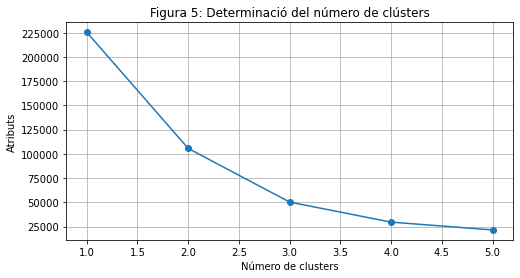

In [104]:
# La curvatura canvia sobtadament a aproximadament 17, per tant aquest serà el nostre valor d'epsilon.
# Trobarem el número optim de clústers aplicant un DBSCAN
atr = []
for i in range(1,6):
    # Calculem la distancia des del centre del clúster determinant un màxim iteracions de 100
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 20)
    kmeans.fit(std_df)
    atr.append(kmeans.inertia_)
#Visualitzem les iteracions
fig = plt.subplots(figsize=(8, 4))
plt.plot(range(1,6), atr, 'o-')
plt.xlabel("Número de clusters")
plt.ylabel("Atributs")
plt.title("Figura 5: Determinació del número de clústers")
plt.grid(True)
plt.show()

In [109]:
# A continuació comprovarem el número de clústers, els -1 és com DBSCAN cataloga el soroll

labels = DBSCAN(eps=15, min_samples=10).fit(std_df)

db = DBSCAN(eps=17, min_samples=2).fit(std_df)
labels = db.labels_
np.unique(labels)

array([-1,  0,  1,  2], dtype=int64)

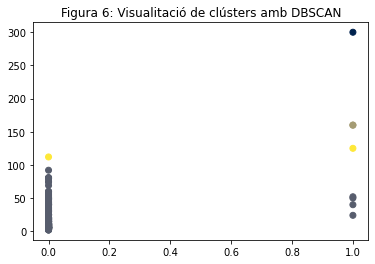

In [106]:
# Obtinc 2 clusters, a continuació visualitzarem cada un dels clústers
# DBSCAN mira la densitat dels punts, en els llocs on no hi ha prou densitat DSCAN els considera com soroll i no els agrupa a cap clúster
# En el seguent gràfic podem veure els dos clústersm un en gris i laltre en groc i el soroll de color blau.
plt.scatter(valors[:, 0], valors[:,1], c = labels, cmap= "cividis")
plt.title("Figura 6: Visualitació de clústers amb DBSCAN")
plt.show()